# Gradient Boosting Method

Determinar se um cliente realizou a compra através de uma propaganda utilizando o método de Gradiente Boosting Method (GBM)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('Social_Network_Ads.csv')

In [3]:
dados.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Coluna User ID não é necessária para o modelo pois é apenas um identificador do usuário

In [4]:
dados.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [5]:
dados = dados.drop('User ID',axis=1)

In [6]:
dados.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


Verificando quantidade de usuários de cada sexo

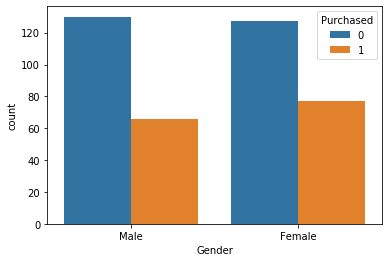

In [18]:
sns.countplot(data=dados,x='Gender',hue='Purchased')

Verificamos que existe um equilíbrio entre homens e mulheres

Vamos verificar a distribuição de idades

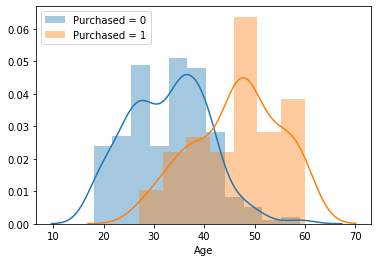

In [17]:
sns.distplot(dados[dados['Purchased']==0]['Age'],label='Purchased = 0')
sns.distplot(dados[dados['Purchased']==1]['Age'],label='Purchased = 1')
plt.legend()

Verificamos que os usuários que realizaram a compra estão na faixa etária entre 40 e 60 anos

Vamos verificar a distribuição de salários

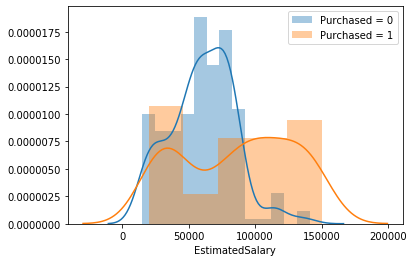

In [19]:
sns.distplot(dados[dados['Purchased']==0]['EstimatedSalary'],label='Purchased = 0')
sns.distplot(dados[dados['Purchased']==1]['EstimatedSalary'],label='Purchased = 1')
plt.legend()

Normalmente os usuário que não efetuam a compra tem um salário estimado inferior a 100k. Já os que efeturaram a compra tem uma faixa ampla de salários

Verificando a quantidade de usuários que efetuaram ou não a compra

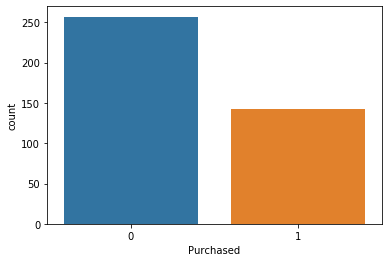

In [20]:
sns.countplot(x='Purchased',data=dados)

Verificamos que aproximadamente 3/8 dos usuários efetuaram a compra

Convertendo a variável categórica Gender para numérica

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
enconder = LabelEncoder()

In [23]:
dados['Gender'] = enconder.fit_transform(dados['Gender'])

In [24]:
dados.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


Normalizando as colunas Age e Estimated Salary

In [25]:
cols = ['Age','EstimatedSalary']

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc = StandardScaler()

In [28]:
dados[cols] = sc.fit_transform(dados[cols])

In [29]:
dados.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,-1.781797,-1.490046,0
1,1,-0.253587,-1.460681,0
2,0,-1.113206,-0.785290,0
3,0,-1.017692,-0.374182,0
4,1,-1.781797,0.183751,0


Determinando as variáveis X e Y

In [33]:
X = dados.drop('Purchased',axis=1).values
Y = dados['Purchased'].values

Separando em amostra de treino e teste

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_treino,X_teste,Y_treino,Y_teste=train_test_split(X,Y,test_size=0.25,random_state=0)

Aplicando modelo GBM

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
modelo = GradientBoostingClassifier()

In [39]:
modelo.fit(X_treino,Y_treino)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Acurácia na amostra de treino

In [41]:
modelo.score(X_treino,Y_treino)

0.98

Realizando previsões com a amostra de teste e determinando acurácia

In [40]:
Y_previsto = modelo.predict(X_teste)

In [42]:
modelo.score(X_teste,Y_teste)

0.91

Criando matriz de confusão

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
cm=confusion_matrix(Y_teste,Y_previsto)

In [45]:
cm

array([[64,  4],
       [ 5, 27]])

Verificamos que sem mesmo ter refinado os parâmetros de entrada do modelo GBM, o mesmo apresentou uma boa acurário nas amostras de treino e teste